

<center><h1>Lab 4: 2D projective geometry and homography estimation</h1></center>

<center>428/615, Martin Jagersand</center>
<br>
<font color="#FF0000">
Submit code and report electronically through the upload link on the e-Class course webpage.<br>
Marks may be given for any of the questions in the assignment, so
please answer them all <br>(many only require a one sentence answer).<br>
Demo: In your lab session.
<!-- Demo: In your lab session during the week following the due date. -->
</font>
<br>
<br>

<b><font size="+1">Exercise 1: Homogeneous and homogeneous transforms <b>(1.5)</b>
</font></b>
<blockquote>
<p>Consider the 3D point (10,10,10). Perform the following operations first
using the Homogeneous formulation of the transforms (3 coordinates) and then
rewrite them in homogeneous form (4 coordinates) . Draw a sketch with the
initial and the transformed point (one figure).
</p>

<ul>
<li>
translate point 20 along positive Y axis</li>

<li>
rotate point around Z axis 30 deg</li>

<li>
rotate point around Y axis -10 deg</li>

<li>
write the resulting composed Homogeneous and homogeneous transformations to perform the
operations in the listed order and simplify to the canonical Homogeneous and homogeneous form respectively. 
</li>
</ul>
What is the corresponding transformation if you perform the same operations
to transform the coordinate frame? Write the homogeneous and Homogeneous representation
of the transformation. Draw a sketch of the initial and transformed coordinate
system (one figure).
<ul>
<li>
translate origin 20 along positive Y axis</li>

<li>
rotate coordinate system around Z axis 30 deg</li>

<li>
rotate around Y axis -10 deg</li>

<li>
write the resulting composed Homogeneous and homogeneous transformations to perform the
operations in the listed order and simplify to the canonical Homogeneous and homogeneous form respectively. 
<!-- write the composite Homogeneous and homogeneous transformations to perform the
operations in the listed order in the following form P_new = T P where
P_new is the point in the new coordinate frame -->
</li>
</ul>
<br>
Write a matlab function that takes a 3-D point, a translation vector and a rotation vector
as input, and returns the new coordinate of the point and the composite transformation matrix T.
Use this function to repeat the exercise above.
<br>

Note: Consider the rotations like in the following figure.
Your rotation vector will be a vector of the rotation angles around each coordinate axis.
Apply the rotations in the appropriate order to get the same results from your MATLAB function
as the results you derived by hand.
<br><img src="rotXYZ.gif" width="587" height="244">
<br>Refer to 
<a target="_blank" href="http://www.cs.ualberta.ca/~jag/courses/ugradCompVis/lectures/lec04Geom.htm">Lecture 
4</a>
</blockquote>


[10 20 10]
[21.30314698 -6.79528724 10.        ]
[-12.434653    -6.79528724 -19.98007698]
[[-0.129428   -0.82902921  0.54402111]
 [-0.98803162  0.15425145  0.        ]
 [-0.08391605 -0.53751006 -0.83907153]]
[-12.434653    -6.79528724 -19.98007698]
[[-0.129428   -0.82902921  0.54402111  0.        ]
 [-0.98803162  0.15425145  0.          0.        ]
 [-0.08391605 -0.53751006 -0.83907153  0.        ]
 [ 0.          0.          0.          1.        ]]
[[ 1.  0.  0.  0.]
 [ 0.  1.  0. 10.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]
[-12.434653    -6.79528724 -19.98007698   1.        ]


<IPython.core.display.Javascript object>


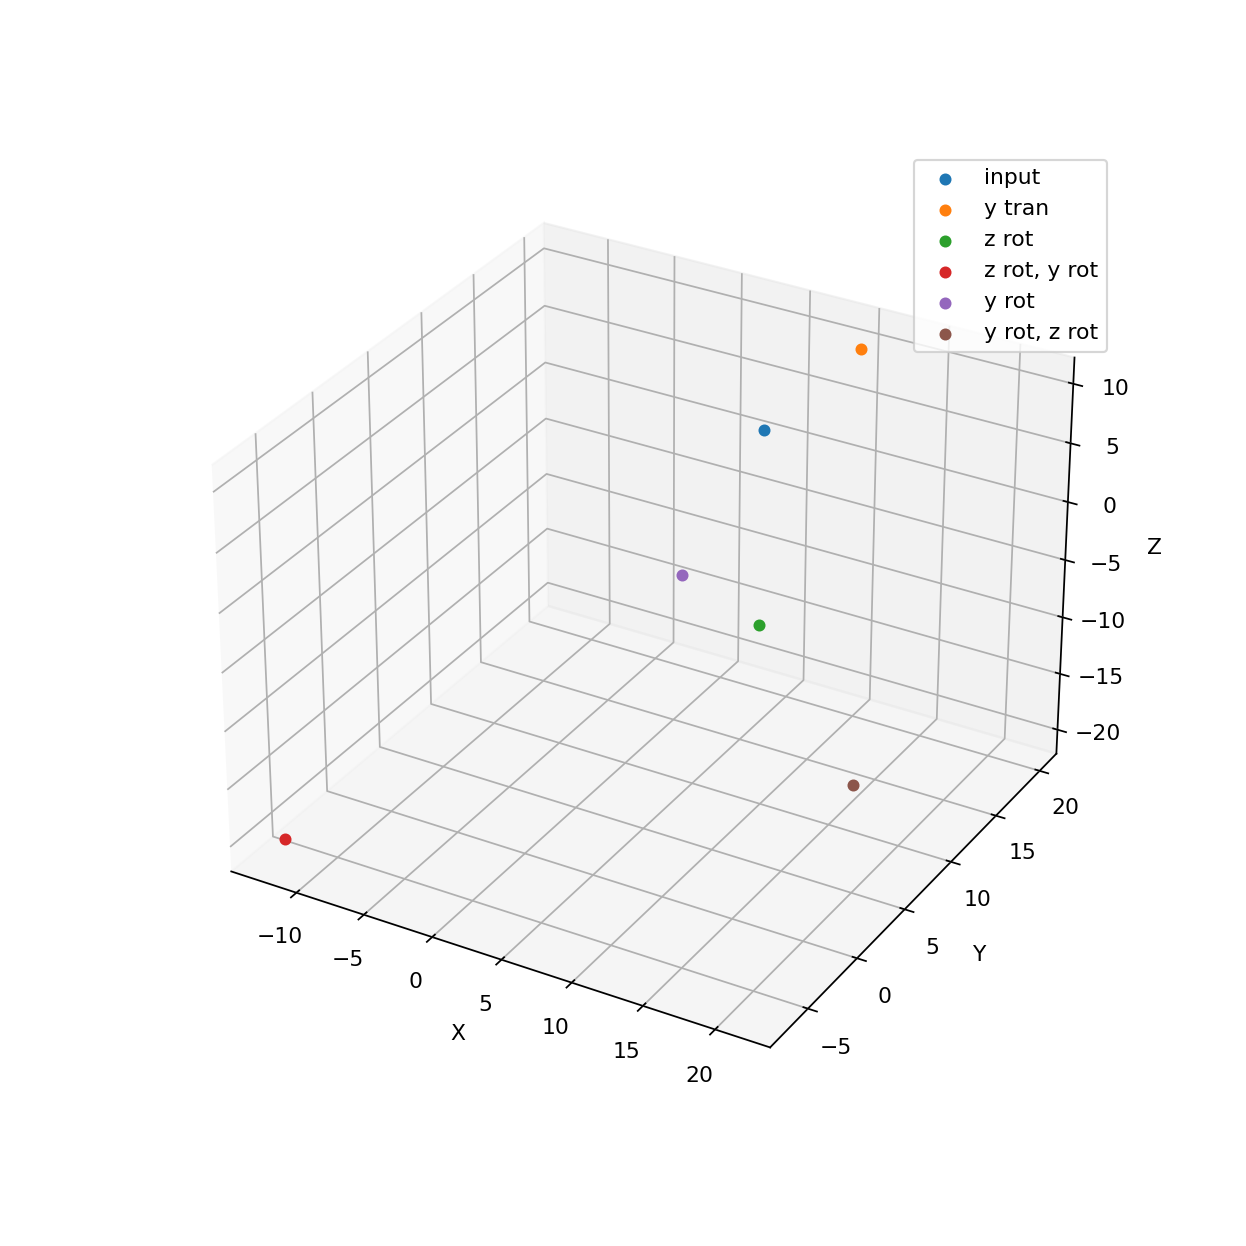

Text(0.5, 0, 'Z')

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%matplotlib notebook
x = 10
y = 10
z = 10
w = 1
Point = np.array([x,y,z])
Homogeneous = np.array([x,y,z,w])

Translate = np.array([0,10,0])

T = Point + Translate
print(T)
xtheta, ytheta, ztheta = 0, -10, 30


# cos sin values
cx, sx = np.cos(xtheta), np.sin(xtheta)
cy, sy = np.cos(ytheta), np.sin(ytheta)
cz, sz = np.cos(ztheta), np.sin(ztheta)
# x rotation matrix
Qx = np.array([[1, 0, 0], 
                    [0, cx, -sx], 
                    [0, sx, cx]])
# y rotation matrix
Qy = np.array([[cy, 0, sy], 
                    [0, 1, 0], 
                    [-sy, 0, cy]])
# z rotation matrix
Qz = np.array([[cz, -sz, 0], 
                    [sz, cz, 0], 
                    [0, 0, 1]])

T = np.matmul(Qz, T)
print(T)

T = np.matmul(Qy, T)
print(T)

QyQz = np.matmul(Qy, Qz)
print(QyQz)
T = Point + Translate
T = np.matmul(QyQz, T)
print(T)
QzQy = np.matmul(Qz, Qy)

HomogeneousRot = np.empty((4,4))
HomogeneousRot[:3, :3] = QyQz
HomogeneousRot[:3, 3] = [0,0,0]
HomogeneousRot[3,:] = [0,0,0,1]

HomogeneousRot1 = np.empty((4,4))
HomogeneousRot1[:3, :3] = QzQy
HomogeneousRot1[:3, 3] = [0,0,0]
HomogeneousRot1[3,:] = [0,0,0,1]

HomogeneousT = np.empty((4,4))
HomogeneousT[:3, :3] = np.identity(3)
HomogeneousT[:3, 3] = Translate
HomogeneousT[3,:] = [0,0,0,1]

HomogeneousRotZ = np.empty((4,4))
HomogeneousRotZ[:3, :3] = Qz
HomogeneousRotZ[:3, 3] = [0,0,0]
HomogeneousRotZ[3,:] = [0,0,0,1]


HomogeneousRotY = np.empty((4,4))
HomogeneousRotY[:3, :3] = Qy
HomogeneousRotY[:3, 3] = [0,0,0]
HomogeneousRotY[3,:] = [0,0,0,1]

print(HomogeneousRot)
print(HomogeneousT)
outa = np.matmul(HomogeneousT, Homogeneous)
outb = np.matmul(HomogeneousRotZ, outa)
out = np.matmul(HomogeneousRot, np.matmul(HomogeneousT, Homogeneous))
out1b = np.matmul(HomogeneousRotY, outa)
out1 = np.matmul(HomogeneousRot1, np.matmul(HomogeneousT, Homogeneous))
print(out)
colors = ['red', 'green', 'blue', 'yellow', 'orange']
labels = ['input', 'y tran', 'z rot', 'z rot, y rot','y rot', 'y rot, z rot']


input = [10,10,10]
input = np.array([input]).T
out = np.array([out]).T
outa = np.array([outa]).T
outb = np.array([outb]).T
out1b = np.array([out1b]).T
out1 = np.array([out1]).T
fig = plt.figure()
fig.set_size_inches(5, 5)
ax = plt.axes(projection="3d")
ax.scatter(*input)
ax.scatter(*outa)
ax.scatter3D(*outb )
ax.scatter3D(*out )
ax.scatter3D(*out1b )
ax.scatter3D(*out1 )
plt.legend(labels)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



<p><b><font size="+1">Exercise 2: </font></b><meta charset="utf-8"> <strong><font size="+1">2D projective Geometry: Points, lines and their incidence.</font></strong><b><font size="+1">
</font></b> <b>(3)</b>
</p><p> References: 
<a href="http://ugweb.cs.ualberta.ca/~vis/courses/CompVis/lectures18/lec06ProjG2D.pdf">lec06ProjG2D.pdf</a> slides 3-5 and 
<a href="http://ugweb.cs.ualberta.ca/~vis/courses/CompVis/lectures18/lec01bCRV16-2018.pdf">lec01bCRV16-2018.pdf</a> slides 46 - 47 
 
</p><p> a. Construct the mid-point and mid-lines of the football field in the image below. <b>(1)</b>
</p><ul>
<li> Click on the corners of the field using ginput.
</li><li> Convert the points to homogeneous coordinates.
</li><li> Compute the diagonal lines l<sub>1</sub> and l<sub>2</sub> (line between two points: l = p<sub>1</sub> x p<sub>2</sub>).
</li><li> Compute the mid point using the diagonal lines:  p<sub>m</sub>= l<sub>1</sub> x l<sub>2</sub>.
</li><li> Compute vanishing point as the point of intersection of either of the two opposite edges of the field: p<sub><span class="style5">∞</span></sub> = l<sub>3</sub> x l<sub>4</sub>
</li><li> Compute mid-line using intersection of mid-point and vanishing point: l<sub>m</sub> = 
p<sub><span class="style5">∞</span></sub> x p<sub>m</sub>.
</li></ul>
<p class="style1">
<meta charset="utf-8">
<span style="font-size: 12pt; font-family: Arial; color: #000000; background-color: transparent; font-weight: 400; font-style: normal; font-variant: normal; text-decoration: none; vertical-align: baseline; white-space: pre; white-space: pre-wrap;" id="docs-internal-guid-6d2f6299-9026-3eb2-1781-6a9c3a1f1d9f">
<img title="not soccer!" src="football_field.jpg" style="border: none; transform: rotate(0.00rad); -webkit-transform: rotate(0.00rad);" width="304" height="228"></span></p><p class="style3">



In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))
  
def convertPoint2Homog(input):
    out = np.array([0,0,1])
    out[:2] = input
    return out

arrPoints = []
img = "football_field.jpg"
Input = cv. imread(img) 
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)


while len(arrPoints)<4:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
cv.destroyAllWindows()
print(arrPoints)
HomogeneousCords = []
for i in arrPoints:
    HomogeneousCords.append(convertPoint2Homog(i))


# topL, topR, bottomL, bottomR
p1, p2, p3, p4 = HomogeneousCords

#diagnal lines
l1 = np.cross(p1, p4)
l2 = np.cross(p2, p3)
# mid point
p_m = np.cross(l1, l2)
p_m = p_m/p_m[2]
print(p_m)
Input = cv.circle(Input, (int(p_m[0]),int(p_m[1])), radius=10, color=(0, 0, 255), thickness=-1)
while True:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break

#side line
l3 = np.cross(p1, p3)
l4 = np.cross(p2, p4)
#vanishing point
p_inf = np.cross(l3, l4)
p_inf = p_inf/p_inf[2]
Input = cv.line(Input, (int(p_m[0]),int(p_m[1])), (int(p_inf[0]),int(p_inf[1])),  color=(0, 0, 255), thickness=5) 
while True:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
print(p_inf)
cv.destroyAllWindows()

[array([280, 249]), array([570, 210]), array([401, 712]), array([1022,  441])]
[534.68433712 314.90214653   1.        ]
[223.53355577  32.93418448   1.        ]



</p><p> b. Constructing mid line in video sequence <b>(1)</b>
</p><ul>
<li>
Place a book or poster with a textured cover on the table. Position the camera to stream video of the book.
</li><li>
Initialize 4 MTF trackers on the 4 corners: user should be able to click on the 4 corners and the trackers should be initialized on a patch with the clicked point as the center and its size specified as a parameter.
</li><li>
Write a program that reads the trackers and draws graphic marking on the video to plot the center point on the book, and the line going across the middle of the book.
</li><li>
Move the camera, and verify that although the video projection changes, the markings stay fixed on the object.
</li></ul>
Some real-world applications of this:
<ul>
<li> Land a helicopter UAV in the middle of an asphalt rectangle.
</li><li> Land a fixed-wing UAV along the midline of a road. 
</li><li> In Augmented Reality (AR), we could use a projector to project lines and points in the real world.
</li></ul>
To think about: Can you solve the midpoint problem if the helicopter landing pad is circular and has no other markings ?


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import lk as tracker
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))
  
def convertPoint2Homog(input):
    out = np.array([0,0,1])
    out[:2] = input
    return out

def findMidPoint(points):
   p1, p2, p3, p4 = [convertPoint2Homog(i) for i in points]
   #diagnal lines
   l1 = np.cross(p1, p4)
   l2 = np.cross(p2, p3)
   # mid point
   p_m = np.cross(l1, l2)
   p_m = p_m/p_m[2]
   return p_m

def drawMidCross(image,p1,p2,p3,p4):
   cv.line(image, (int(p1[0]),int(p1[1])), (int(p4[0]),int(p4[1])),  color=(0, 0, 255), thickness=5) 
   cv.line(image, (int(p2[0]),int(p2[1])), (int(p3[0]),int(p3[1])),  color=(0, 0, 255), thickness=5) 
   return image
def drawTrackPoints(image, arrP):
    for i in arrP:
        image = cv.circle(image, (int(i[0]),int(i[1])), radius=10, color=(0, 0, 255), thickness=-1)
    return image
        

cam = cv.VideoCapture(0)
ret, Input = cam.read()
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)
arrPoints = []
while len(arrPoints)<4:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
init_corners = np.array(arrPoints).T
tracker.initTracker(Input, init_corners)
cv.destroyAllWindows()
while True:
    # read frame
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    points = tracker.updateTracker(frame)
    points = points.T
    mPoint = findMidPoint(points)
    frame = cv.circle(frame, (int(mPoint[0]),int(mPoint[1])), radius=10, color=(0, 0, 255), thickness=-1)
    frame = drawMidCross(frame, *points)
    frame = drawTrackPoints(frame, points)

    cv.imshow("test", frame)
    k = cv.waitKey(1)
    if k%256 == 27:
    # ASCII:ESC pressed, exit
        print("Escape hit, closing...")
        break
cv.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\video\src\lkpyramid.cpp:1260: error: (-215:Assertion failed) (npoints = prevPtsMat.checkVector(2, CV_32F, true)) >= 0 in function 'cv::`anonymous-namespace'::SparsePyrLKOpticalFlowImpl::calc'



<p> c. Parallel lines and line-to-line <b>(1)</b>
</p><ul>
<li>
Use e.g. two books with textured covers or papers / posters. Lay the books on a table a bit away from each other.
</li><li>
Construct the parallel lines constraint. 
<ul>
<li> 
<meta charset="utf-8">
<span style="font-size: 12pt; font-family: Arial; color: #000000; background-color: transparent; font-weight: 400; font-style: normal; font-variant: normal; text-decoration: none; vertical-align: baseline; white-space: pre; white-space: pre-wrap;" id="docs-internal-guid-6d2f6299-915f-6f82-0cd2-a33dd89f53de">
<img src="ll_1.png" style="border: none; transform: rotate(0.00rad); -webkit-transform: rotate(0.00rad);" width="272" height="224"><meta charset="utf-8"><span style="font-size: 12pt; font-family: Arial; color: #000000; background-color: transparent; font-weight: 400; font-style: normal; font-variant: normal; text-decoration: none; vertical-align: baseline; white-space: pre; white-space: pre-wrap;" id="docs-internal-guid-6d2f6299-915f-c318-e3e9-a05114830724"><img src="ll_2.png" style="border: none; transform: rotate(0.00rad); -webkit-transform: rotate(0.00rad);" class="style4" width="270" height="222"></span></span></li><li> 
parallel lines: epar(l) = (l<sub>1</sub> x l<sub>2</sub>) x (l<sub>3</sub> x l<sub>4</sub>)
</li></ul>

</li><li>
Move one book and track two lines on it using trackers initialized at the endpoints of the lines as in part (b).
The lines on the other book do not need to be tracked, but can be selected in the first frame and assumed to be fixed, as the book is stationary.
</li><li>
  Display the value of the constraint in the image (as a text annotation). Note that it is vector-valued. Verify that its magnitude decreases when the books are near parallel, and that its direction changes when the books cross the point of being parallel.
</li><li>
Similarly construct the line-to-line constraint, and display its value in the image.
<ul>
<li>
<meta charset="utf-8">
<span style="font-size: 12pt; font-family: 'Times New Roman'; color: #008000; background-color: transparent; font-weight: 400; font-style: normal; font-variant: normal; text-decoration: none; vertical-align: baseline; white-space: pre; white-space: pre-wrap;" id="docs-internal-guid-6d2f6299-9160-911a-eb72-9e1230f1016f">
<img src="parl_1.png" style="border: none; transform: rotate(0.00rad); -webkit-transform: rotate(0.00rad);" width="275" height="202"><meta charset="utf-8"><span style="font-size: 12pt; font-family: 'Times New Roman'; color: #008000; background-color: transparent; font-weight: 400; font-style: normal; font-variant: normal; text-decoration: none; vertical-align: baseline; white-space: pre; white-space: pre-wrap;" id="docs-internal-guid-6d2f6299-9160-a048-60ba-36eae19cde34"><img src="parl_2.png" style="border: none; transform: rotate(0.00rad); -webkit-transform: rotate(0.00rad);" width="283" height="203"></span></span>
</li><li>line-to-line: ell(y) = y<sub>1</sub> . (y<sub>3</sub> x y<sub>4</sub>) + y<sub>2</sub>. (y<sub>3</sub> x y<sub>4</sub>)
</li></ul>
</li><li>
Verify that both constraints work both when the books are side-by-side and on 
top of each other.</li><li>
The projective lines are ideal, infinitely long lines. Not limited to the physical edge of the book / object.
</li><li>To avoid having very large numbers for the constraints, normalize the points and lines before computing the constraints.</li>
</ul>

Some real-world applications of this:
<ul>
<li> Computer vision-guided robot control (as in the images above).
</li><li> Building inspection: For commercial buildings a final inspection is done before hand-over from the builder to the new owner to ensure doors, windows walls etc. are all lined up correctly. 
</li></ul>

<br>


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import lk as tracker
import lk as tracker1
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))
  
def convertPoint2Homog(input):
    out = np.array([0,0,1])
    out[:2] = input
    return out

   
def drawParallelLine(image,p1,p2,p3,p4):
    cv.line(image, (int(p1[0]),int(p1[1])), (int(p2[0]),int(p2[1])),  color=(0, 0, 255), thickness=5) 
    cv.line(image, (int(p3[0]),int(p3[1])), (int(p4[0]),int(p4[1])),  color=(0, 0, 255), thickness=5) 
    return image

def epar (points1, points2):
    p1, p2, p3, p4 = [convertPoint2Homog(i) for i in points1]
    p5, p6, p7, p8 = [convertPoint2Homog(i) for i in points2]
    l1 = np.cross(p1, p2)
    l2 = np.cross(p3, p4)
    l3 = np.cross(p5, p6)
    l4 = np.cross(p7, p8)
    cross1 = np.cross(l1, l2)
    cross2 = np.cross(l3, l4)
    result = np.cross(cross1, cross2)
    return result/result[2]
def ell (p1,p2,p3,p4):
    l1 = np.cross(p3, p4)
    return np.dot(p1, l1) + np.dot(p2, l1)
   


cam = cv.VideoCapture(0)
ret, Input = cam.read()
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)
arrPoints = []
while len(arrPoints)<8:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
arrPoints1, arrPoints2 =  arrPoints[:len(arrPoints)//2], arrPoints[len(arrPoints)//2:]
init_corners1 = np.array(arrPoints1).T


tracker.initTracker(Input, init_corners1)
cv.destroyAllWindows()
while True:
    # read frame
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    points = tracker.updateTracker(frame)
    points = points.T
    # mPoint = findMidPoint(points)
    # frame = cv.circle(frame, (int(mPoint[0]),int(mPoint[1])), radius=10, color=(0, 0, 255), thickness=-1)
    # frame = drawMidCross(frame, *points)
    frame = drawTrackPoints(frame, points)
    frame = drawParallelLine(frame, *points)
    frame = drawTrackPoints(frame, arrPoints2)
    frame = drawParallelLine(frame, *arrPoints2)
    eparResult = epar(points, arrPoints2)
    eparResult = eparResult/eparResult[2]
    eparResult = str(np.linalg.norm(eparResult[:2]))
    frame = cv.putText(frame, 'epar' + eparResult, (0,25), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv.LINE_AA)
    # frame = cv.putText(frame, 'OpenCV', (240,25), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv.LINE_AA)
    cv.imshow("test", frame)
    k = cv.waitKey(1)
    if k%256 == 27:
    # ASCII:ESC pressed, exit
        print("Escape hit, closing...")
        break
cv.destroyAllWindows()

Escape hit, closing...


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import lk as tracker
import lk as tracker1
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))
  
def convertPoint2Homog(input):
    out = np.array([0,0,1])
    out[:2] = input
    return out

   
def drawParallelLine(image,p1,p2,p3,p4):
    cv.line(image, (int(p1[0]),int(p1[1])), (int(p2[0]),int(p2[1])),  color=(0, 0, 255), thickness=5) 
    cv.line(image, (int(p3[0]),int(p3[1])), (int(p4[0]),int(p4[1])),  color=(0, 0, 255), thickness=5) 
    return image

def epar (points1, points2):
    p1, p2, p3, p4 = [convertPoint2Homog(i) for i in points1]
    p5, p6, p7, p8 = [convertPoint2Homog(i) for i in points2]
    l1 = np.cross(p1, p2)
    l2 = np.cross(p3, p4)
    l3 = np.cross(p5, p6)
    l4 = np.cross(p7, p8)
    cross1 = np.cross(l1, l2)
    cross2 = np.cross(l3, l4)
    result = np.cross(cross1, cross2)
    return result/result[2]
def ell (points):
    p1, p2, p3, p4 = [convertPoint2Homog(i) for i in points]
    l1 = np.cross(p3, p4)
    l1 = l1/l1[2]
    return np.dot(p1, l1) + np.dot(p2, l1)
   


cam = cv.VideoCapture(0)
ret, Input = cam.read()
cv.namedWindow("test")
cv.setMouseCallback("test", draw_point)
arrPoints = []
while len(arrPoints)<4:
    # dIm[dIm>=80] = 255
    cv.imshow("test", Input)
    k = cv.waitKey(1)
    if k%256 == 27:
        break
constantPoints = arrPoints[2:4]
arrPoints[2:4] = [0,0], [0,0]
init_corners = np.array(arrPoints).T

tracker.initTracker(Input, init_corners)
cv.destroyAllWindows()
while True:
    # read frame
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    points = tracker.updateTracker(frame)
    points = points.T
    # mPoint = findMidPoint(points)
    # frame = cv.circle(frame, (int(mPoint[0]),int(mPoint[1])), radius=10, color=(0, 0, 255), thickness=-1)
    # frame = drawMidCross(frame, *points)
    frame = drawTrackPoints(frame, [constantPoints[0], constantPoints[1], [0,0], [0,0]])
    frame = drawParallelLine(frame, *[constantPoints[0], constantPoints[1], points[0], points[1]])
    frame = drawTrackPoints(frame, points)
    
    # frame = drawParallelLine(frame, *arrPoints2)
    # eparResult = epar(points, arrPoints2)
    # eparResult = eparResult/eparResult[2]
    # eparResult = str(np.linalg.norm(eparResult[:2]))
    frame = cv.putText(frame, 'ell: ' + str(ell([constantPoints[0], constantPoints[1], points[0], points[1]])), (0,25), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv.LINE_AA)
    # frame = cv.putText(frame, 'OpenCV', (240,25), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv.LINE_AA)
    cv.imshow("test", frame)
    k = cv.waitKey(1)
    if k%256 == 27:
    # ASCII:ESC pressed, exit
        print("Escape hit, closing...")
        break
cv.destroyAllWindows()

Escape hit, closing...



<b><font size="+1">Exercise 3: Homography estimation in static images </font></b> <b>(4.5)</b>

<p> 
Reference: 
<a href="http://ugweb.cs.ualberta.ca/~vis/courses/CompVis/lectures18/lec06ProjG2D.pdf">lec06ProjG2D.pdf,</a> slides 40-44

</p><blockquote>
<p> Given two images of a planar scene and a set of four or more 2D point 
correspondences between the images (
<b>x<sub>i</sub></b> &lt;--&gt; <b>x'<sub>i</sub></b>
), compute the homography, H, which relates one image to the other, and then apply H to the first image to see if you get similar image as the second one.  

</p><p>
Some useful commands in matlab to select files and points:
imgetfile, cpselect, uigetfile, getpts and possibly many others. Use doc in matlab command window or google the relevant commands.
</p><p>
(a). <b>(1.5)</b> Write a matlab program that displays two images. Allow the user to 
select four or more points in each image. Use these correspondences to 
estimate the homography by the direct linear transform algorithm (DLT).
Apply the homography to the first image, such as using <a href="https://www.mathworks.com/help/images/ref/imwarp.html"><code>imwarp</code></a>.
For <code>imwarp</code>, you may need to use the transpose of your homography matrix, and may want to set the <code>'OutputView'</code> argument to preserve the size of the image.
</p><p>
(b). <b>(1)</b> Recall that in DLT we need to constrain the magnitude of the homography H to be strictly positive, which is usually done by constraining the Euclidean norm of H to be 1 (as in (a)). We also need a loss function on the residual Ah, which is again usually done by the Euclidean norm (as in (a)). Replace the loss function by the L1 norm (sum of absolute values) and do (a) again. 
</p><p>
A numerical procedure to solve the L1 norm based DLT is outlined  <a href="l1DLT.pdf">here</a>. Graduate students are welcome (but not compulsory) to come up with their own numerical procedures.     

</p><p>
(c). <b>(1)</b> Add the normalization procedure into the DLT algorithm (in both (a) and (b)): For
undergraduate students, translate the points such that they center around the origin, then
scale the points such that  their sum of distances to the origin is fixed to root 2; For
graduate students, use principal component analysis to center the points and  normalize the
variances in different principal axes to unity. Please do NOT forget to apply the inverse normalization after estimating the homography.        

</p><p>
(d). Discussion <b>(1)</b>

</p><p>Compare (a) and (b) by deliberately picking some pair(s) of points that do not correspond to each other (i.e., outliers). Here is what I will do for the comparison: Choose perfect correspondences first and estimate the homography H by (a) and (b), then ruin some correspondence(s) and run (a) and (b) again, how significantly will the estimated homography change? (You can apply the homography to the image and see how the recovery changes). Repeat what you have done with (c) turned on. 

</p><p>
Use the sample images below or capture your own.
<br><br clear="all">
<a href="key1.jpg"><img src="key1.jpg" height="100"></a>
<a href="key2.jpg"><img src="key2.jpg" height="100"></a>
<a href="key3.jpg"><img src="key3.jpg" height="100"></a>
<a href="homog1.jpg"><img src="homog1.jpg" height="100"></a>

<br><br>

</p><p>
Provide comments for each step of your implementation.
I expect your implementation to have flags that can switch between (a) and (b), and can turn normalization (c) on and off.

</p><ul>
  <strong>
<li>After the homography is applied, do the overlapping areas in the two images look exactly the same? Why / why not?
</li><li>Correspondences are not always perfect. What happens if some of the correspondences are incorrect? How can this be handled?
</li><li>This method is being used to align two images of a planar surface. Can it be used to align images of non-planar objects? What conditions need to be met?
</li></strong><li><strong>What if we only have four or more corresponding pairs of lines, instead of points? Or some pairs of points and some pairs of lines? Will the algorithm still work (under obvious modifications)?
</strong>
</li></ul>
</blockquote>


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
def draw_point(event, x, y, flags, param):
   global Input, arrPoints
   if event == cv.EVENT_LBUTTONDOWN:
      Input = cv.circle(Input, (x,y), radius=10, color=(0, 0, 255), thickness=-1)
      arrPoints.append(np.array([x,y]))
points = 6

def getA(x, y):
    A = np.zeros((2, 9))
    A[0, 3:6] = -x* y[2]
    A[0, 6:9] = x* y[1]
    A[1, :3] = x*y[2]
    A[1, 6:9] = -x*y[0]
    return A
# print(A)

decent = False
normalize = False

img1 = cv. imread("key1.jpg")
img2 = cv. imread("key3.jpg") 

Input = img1.copy()
cv.namedWindow("test1")
cv.setMouseCallback("test1", draw_point)

arrPoints = []
while len(arrPoints)<points:
    # dIm[dIm>=80] = 255
    cv.imshow("test1", Input)
    # cv.imshow("test2", img2)  
    k = cv.waitKey(1)
    if k%256 == 27:
        break
cv.destroyAllWindows()
cv.namedWindow("test2")
cv.setMouseCallback("test2", draw_point)
img1Points = arrPoints.copy()
arrPoints = []
img1 = Input.copy()
Input = img2.copy()
# img1 = drawPointtoImg(img1, img1Points)
while len(arrPoints)<points:
    # dIm[dIm>=80] = 255
    cv.imshow("test1", img1)
    cv.imshow("test2", Input)  
    k = cv.waitKey(1)
    if k%256 == 27:
        break
cv.destroyAllWindows()
img2Points = arrPoints.copy()
img2 = Input.copy()

def convertPoint2Homog(input):
    out = np.array([0,0,1])
    out[:2] = input[:2]
    return out
def solveForH(img1Points, img2Points, normalize):
    global t_norm, t_norm_1
    A = []
    for i in range (points):
        x = np.array(convertPoint2Homog(img1Points[i]))
        x_1 = np.array(convertPoint2Homog(img2Points[i]))
        if normalize:
            x = np.matmul(t_norm,x.T)*np.sqrt(2)
            x_1 = np.matmul(t_norm_1, x_1.T)
        A.append(getA(x, x_1))
    

    B = np.concatenate((A[0], A[1], A[2], A[3]), axis=0)
    U, S, V = np.linalg.svd(B)
    # print(V[:, -1])
    H = V[-1, :]
    if decent:
        for j in range(10):

            min = np.matmul(B,H)
            min = np.abs(min)
            min[min<1e-14] = 1e-14

            n = np.diag(1/np.sqrt(min))
            B = np.matmul(n,np.array(B))
            U, S, V = np.linalg.svd(B)
            # print(V[:, -1])
            H = V[-1, :]
    H = H.reshape(3,3)
    if normalize:
        H =  H * np.sqrt(2)
        H = np.matmul(np.linalg.inv(t_norm_1), H)
        H = np.matmul(H, t_norm)
        # H = H*15
    # print(H)
    return H

# h, w = np.mean(img1Points, axis=0)
# h_1, w_1 = np.mean(img2Points, axis=0)


h, w, t = img1.shape
h_1, w_1, t = img2.shape
t_norm = np.linalg .inv(np.array([[w+h, 0, w/2],
                                [0, w+h, h/2],
                                [0,0,1]]))
t_norm_1 = np.linalg.inv(np.array([[w_1+h_1, 0, w_1/2],
                                    [0, w_1+h_1, h_1/2],
                                    [0,0,1]]))
norm1 = []
norm2 = []

height, width = img2.shape[:2]
mean1 = np.array([w,h])
mean2 = np.array([w_1,h_1])
norm1 = img1Points - mean1
norm2 = img2Points - mean2
while True:
    H = solveForH(img1Points, img2Points, normalize)
    print(H)

    img1 = cv. imread("key1.jpg")
    dst = cv.warpPerspective(img1, H, (width,height))
    dst = cv.putText(dst, 'norm?: ' + str(normalize), (0,25), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv.LINE_AA)
    dst = cv.putText(dst, 'decent?: ' + str(decent), (240,25), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv.LINE_AA)
    # dIm[dIm>=80] = 255
    cv.imshow("test1", img1)
    cv.imshow("test2", img2)  
    cv.imshow("Res", dst)
    # cv.imshow("res1", dst1)
    k = cv.waitKey(0)
    if k%256 == 27:
        break
    if k%256 == 99:
        print("switch")
        normalize = not(normalize)
    if k%256 == 98:
        print("switch")
        decent = not(decent)
cv.destroyAllWindows()

[[ 6.75638519e-03  4.33435608e-03 -1.16987605e-01]
 [-2.65131482e-03  1.36141543e-02 -9.92969166e-01]
 [ 2.22868442e-06  1.81959385e-06  8.32616118e-03]]
switch
[[ 5.25386524e-01  3.37045951e-01 -9.09712950e+00]
 [-2.06170169e-01  1.05865681e+00 -7.72147537e+01]
 [ 1.73305803e-04  1.41494314e-04  6.47454631e-01]]
switch
[[ 6.75638519e-03  4.33435608e-03 -1.16987605e-01]
 [-2.65131482e-03  1.36141543e-02 -9.92969166e-01]
 [ 2.22868442e-06  1.81959385e-06  8.32616118e-03]]



<b><font size="+1">Exercise 4: Homography on live video for Augmented Reality. </font></b> <b>(Bonus - 3)</b>
<ul>
<li> Track 4 points on a textured planar surface (e.g. poster, book cover).
</li><li> Compute the homography in real time.
</li><li> In the camera video, project a point or line drawing onto the book cover. Move the camera and verify that the drawing stays fixed.
</li><li> Variation for 1 bonus mark: Project a new cover image on the book. Verify as above.
</li></ul>

 


[3. 4.]
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]
